48000


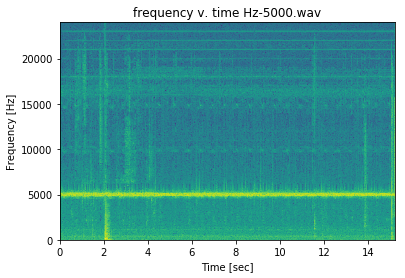

(515, 811)
(515,)
(811,)


Text(0.5,1,'frequency v. time Hz-5000.wav')

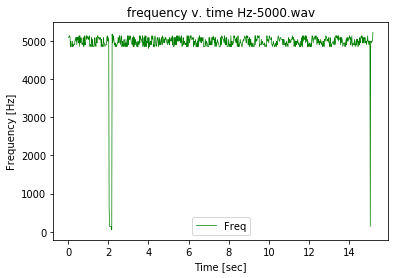

In [162]:
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plot
from scipy.io import wavfile
from scipy import signal

#change frequency file here (in Hz)
file_freq = 5000
file = 'Hz-'+str(file_freq)+'.wav'


samplingFrequency, signalData = wavfile.read(file)
print(samplingFrequency)

Spec, freqs, times, im = plot.specgram(signalData[:,0], NFFT=1028, Fs=samplingFrequency)
x1, x2, y1, y2 = plot.axis()
#plot.axis((x1, x2, 0, 3000))
plot.ylabel('Frequency [Hz]')
plot.xlabel('Time [sec]')
plot.title('frequency v. time ' + file)
plot.show()
print(np.shape(Spec))
print(np.shape(freqs))
print(np.shape(times))

maxs = np.argmax(Spec,axis=0)
found_freqs = freqs[maxs]
ax = sns.lineplot(times, found_freqs, label='Freq', color='green', linewidth=.7)
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.set_title('frequency v. time ' + file)
#ax.set(ylim=(file_freq-200,file_freq+200))

5119.402985074627
4886.039886039886

5099.8029208145945
4901.366392181703

0.38285839808227573
0.3136795134564282


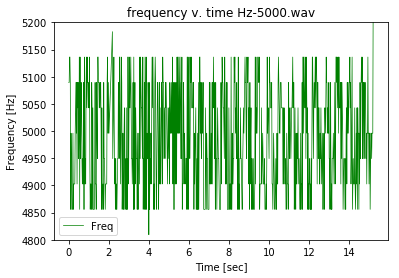

In [163]:
from scipy.signal import argrelextrema

def reject_outliers(data, time, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m], time[s<m]

found_freqs_mod, times_mod = reject_outliers(found_freqs, times, m = 20.)

ax = sns.lineplot(times_mod, found_freqs_mod, label='Freq', color='green', linewidth=.7)
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.set_title('frequency v. time ' + file)
ax.set(ylim=(file_freq-200,file_freq+200))

calc_freq_high = 343/(343-8)*file_freq
calc_freq_low = 343/(343+8)*file_freq
print(calc_freq_high)
print(calc_freq_low)
print()

#more robust idea of only taking local extrema to calculate max mean freq
a=found_freqs_mod
freq_high_idx = argrelextrema(a, np.greater)
freq_high = a[freq_high_idx]
freq_high = freq_high[freq_high > file_freq]
print(freq_high.mean())

freq_low_idx = argrelextrema(a, np.less)
freq_low = a[freq_low_idx]
freq_low = freq_low[freq_low < file_freq]
print(freq_low.mean())

error_high = 100*np.abs(calc_freq_high-freq_high.mean())/calc_freq_high
error_low = 100*np.abs(calc_freq_low-freq_low.mean())/calc_freq_low
print()
print(error_high)
print(error_low)

46.692607003891226


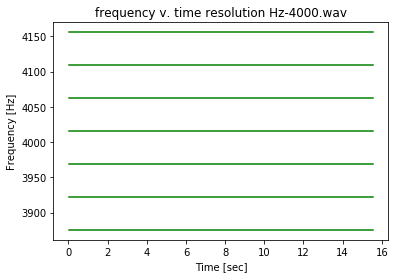

In [158]:
uniq_high = np.unique(freq_high)
uniq_low = np.unique(freq_low)

for i in range(len(uniq_high)):
    ax = sns.lineplot(times_mod, np.full(len(times_mod), uniq_high[i]), color='green')
for i in range(len(uniq_low)):
    ax = sns.lineplot(times_mod, np.full(len(times_mod), uniq_low[i]), color='green')
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.set_title('frequency v. time resolution ' + file)

print(uniq_high[1]-uniq_high[0])